# Project-2: Investigate  FBI Gun Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# FBI Gun dataset:
## the data comes with U.S census data based on estimates for population on 2016
this data is the backgroun check for potential gun custumers it contains 27 columns and 12485 rows.
- there are 26 columns contains Nan values
- all the data columns except 4 columns contain floating data
- the month column contains data of type strings
- what i am going to check is:
-1- which state has the largest number of check at the last year.
-2- how much does these number represent the population of that state.
-3- what is the overall trend of gun check through the time dataset covers.
-4- which state has the most checks for guns rent 

In [1]:
# importing liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading data inspect data types and missing values.
guns = pd.read_csv('gun_data.csv')
census = pd.read_csv('U.S. Census Data.csv')

In [3]:
# exploring the data and the data types
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [4]:
guns.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [5]:
guns.duplicated().sum()

0

In [6]:
guns.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [8]:
census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

### the gun dataset has some problems:
- it has too many null values
- the month column in string data type 
- most of the data is in float datatype

### the Census dataset has some problems:
- the data in columns in differnt dtypes
- many null vlaues
- unnecessary data

### Data Cleaning.
####  what should i do with Nans? ----> 
**I decided to fill these with Zeros as it is all numbers and the columns contaning this has a trend of 0 value**
### Guns Dataset.

In [9]:
# filling the null values with 0 
guns.fillna(value=0,inplace=True)

In [10]:
# changing the data type form float to integers
for column in guns.columns:
    try:
        guns[column] = guns[column].astype('int')
    except:
        continue

In [11]:
# converting month datatype into datetime datatype
guns['month']= pd.to_datetime(guns['month'])

In [12]:
# extracting the year data into a separate column
guns['year']= guns['month'].apply(lambda x:x.year)

In [13]:
# reindexing the the year column to be the first column
year = guns.pop('year')
guns.insert(0,'year',year)

In [14]:
# recheck the data
guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       12485 non-null  int64         
 1   month                      12485 non-null  datetime64[ns]
 2   state                      12485 non-null  object        
 3   permit                     12485 non-null  int32         
 4   permit_recheck             12485 non-null  int32         
 5   handgun                    12485 non-null  int32         
 6   long_gun                   12485 non-null  int32         
 7   other                      12485 non-null  int32         
 8   multiple                   12485 non-null  int32         
 9   admin                      12485 non-null  int32         
 10  prepawn_handgun            12485 non-null  int32         
 11  prepawn_long_gun           12485 non-null  int32         
 12  prep

### Cenus dataset.

In [15]:
census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [16]:
census.drop(index=range(1,85),axis=0,inplace=True)

In [17]:
census.drop('Fact Note',axis=1,inplace=True)

In [18]:
census=census.transpose(copy=False)

In [19]:
census.reset_index(inplace=True)

In [20]:
census.rename(columns={'index':'state',0:'population_estimates_2016'},inplace=True)

In [21]:
census.drop(index=0,inplace=True)

In [22]:
census.reset_index(inplace=True)

In [23]:
census.drop('index',axis=1,inplace=True)

In [24]:
census.head()

,state,population_estimates_2016
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [25]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      50 non-null     object
 1   population_estimates_2016  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


### Census population data has a string datatype and contains **','** so we should remove these commaas and convert it into int datatype

In [26]:
census['population_estimates_2016']=census['population_estimates_2016'].apply(lambda x:''.join(x.split(',')))

In [27]:
census['population_estimates_2016']=census['population_estimates_2016'].astype('int',copy=False)

In [28]:
census.head()

,state,population_estimates_2016
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


#### Census data has a lot of problems:
- there are population data for 5 states missed.
- there are alot of data unnecessary for this analysis I have to remove to make investigation easier
- I had to transopse the data to make it fit with guns data structure to make the merge
-  After the above changes I reseted the index.

In [29]:
# merging two datasets
final_data = guns.merge(how='outer',on='state',right=census)

In [30]:
#checking the null values in the new dataset
final_data[final_data['population_estimates_2016'].isnull()]['state'].unique()

array(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis
### 1- Which state has the largest number of gun checks over the last year?

In [31]:
# making a groupby dataframe to investigate which state has the first place in number of checks in 2017.
largest_state_in_permits_check = final_data.groupby(['state','year'])['permit'].sum()

In [32]:
print(largest_state_in_permits_check.loc[:,2017].idxmax())
print(largest_state_in_permits_check.loc[:,2017].max())

Kentucky
3229334


In [33]:
# preparing for visulisation of kentucky state data
kentucky = largest_state_in_permits_check.loc['Kentucky']
height =kentucky.values
years = kentucky.index

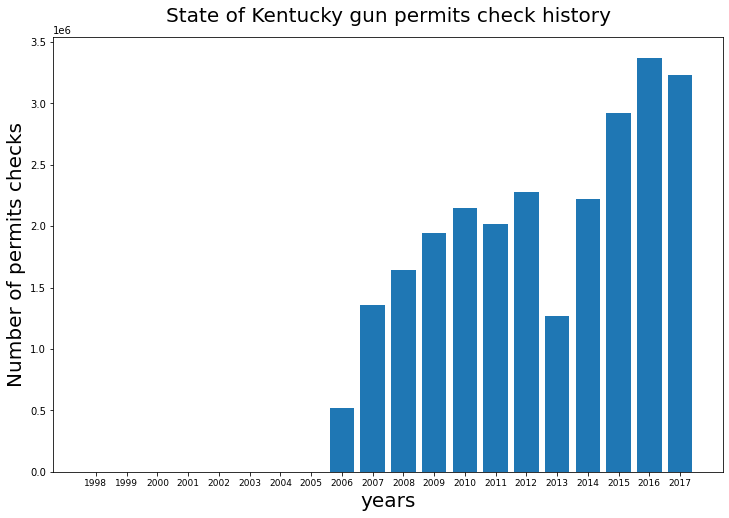

In [34]:
# Kentucky history visulization
plt.figure(figsize=(12,8))
plt.bar(years,height=height)
plt.xticks(years,fontsize=9)
plt.xlabel('years',fontsize=20)
plt.ylabel('Number of permits checks',fontsize=20)
plt.title('State of Kentucky gun permits check history',fontsize=20,pad=15);

#### this plot shows us that state of Kentucky has an increaseing number of checks since 2006 until now although there is an obvious decrease in 2013 but the overall trend is ascending.

### 2- which state has the higher estimate for gun per capita?

In [35]:
grouped = final_data.groupby('state').sum()

In [36]:
# we have some population data missinig we can't divide by zero 
#so we are going to drop rows containing zero in population column
mask = grouped[grouped['population_estimates_2016']<=0].index

In [37]:
grouped.drop(mask,axis=0,inplace=True)

In [38]:
grouped.dropna(inplace=True)

In [39]:
# creating column for gun per capita
grouped['gun_per_capita']= grouped['totals']/grouped['population_estimates_2016']

In [40]:
# getting the state
print(grouped['gun_per_capita'].idxmax())
print(grouped['gun_per_capita'].max())

Kentucky
0.02954987882571848


### 3- what is the overall trend of gun purchase?

this datasets we have doesn't include anything about gun purchase as these checks for potential customers 
no clue if the deal was done or not. still, it can give us an indecation about the market movement as the checks increase number means ther is potentiality guns market increase.

In [41]:
year_grouped = final_data.groupby('year').sum()
year_grouped['totals']

year
1998      891898
1999     9043747
2000     8427096
2001     8820045
2002     8367069
2003     8402244
2004     8579891
2005     8867055
2006     9993057
2007    11162272
2008    12692985
2009    13984953
2010    14320489
2011    16336732
2012    19463832
2013    20966704
2014    20860241
2015    23026288
2016    27425512
2017    17990528
Name: totals, dtype: int32

In [42]:
trend_years = year_grouped['totals'].index
trend_heights = year_grouped['totals'].values

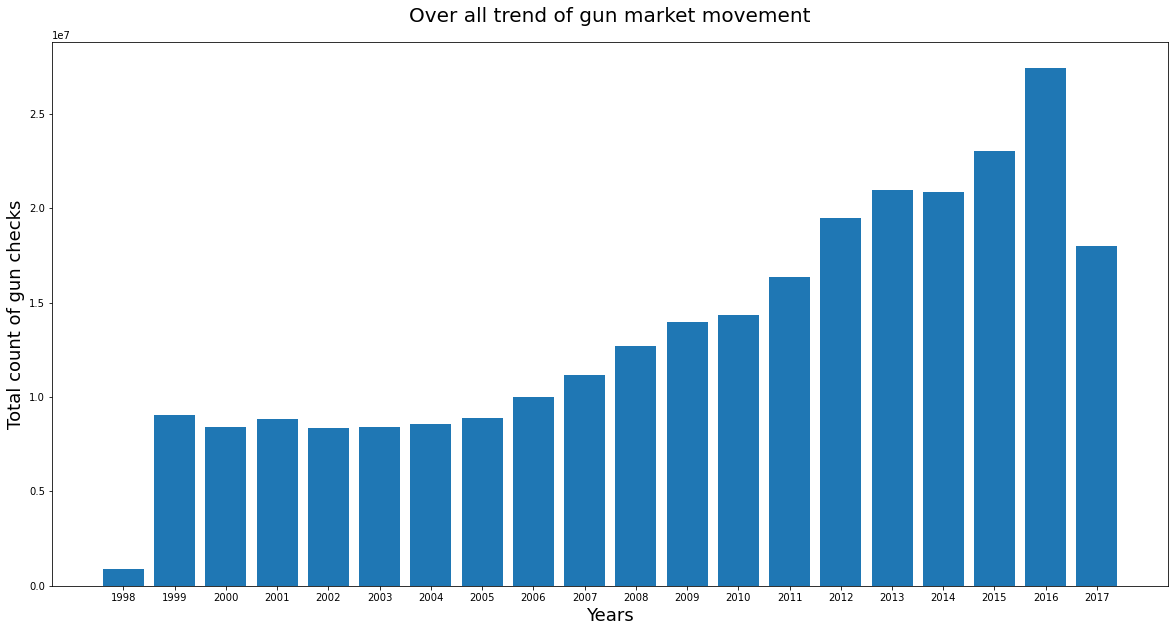

In [43]:
plt.figure(figsize=(20,10))
plt.bar(trend_years,trend_heights)
plt.xticks(trend_years)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total count of gun checks',fontsize=18)
plt.title('Over all trend of gun market movement',fontsize=20,pad=20);

### this plot shows that the overall trend of the gun market is in moving towards more and more since 1998 unitl 2016 the number of checks is increasing but it had a large drop in 2017. this could be the endo of an era and kick off point to another or just a suden drop and it will recover the later data will teel us.

<a id='conclusions'></a>
## Conclusions
  ### Results:
   #### 1- the largest state in number of gun checks in 2017 is [Kentucky] with 3229334 checks .
   #### 2- State of Kentucky has history of increasing gun permits checks since 2006.
   #### 3- the largest state with largest percent of gun per capita is [Kentucky] which has 3 persons among 100 person own                             guns.
   #### 4- the over all trend of gun purchases is increasing, but it has abrupt increas in 2016 followed by more abrupt                                               decerase in 2017.
  ### LImitations:
   #### 1- the data has a lot of missing values.
   #### 2- the census data rely on population estimates not a real measurement which could iclude error percentatge.

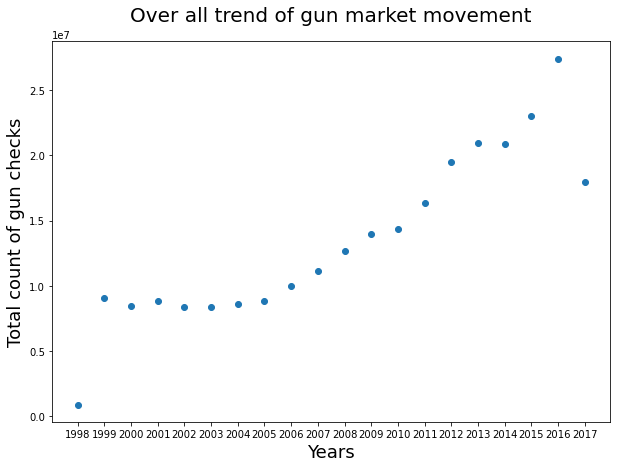

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(trend_years,trend_heights)
plt.xticks(trend_years)
plt.xlabel('Years',fontsize=18)
plt.ylabel('Total count of gun checks',fontsize=18)
plt.title('Over all trend of gun market movement',fontsize=20,pad=20);

In [49]:
final_data.corr()

,year,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,population_estimates_2016
year,1.000000e+00,0.187527,0.059988,0.330014,0.070281,0.217527,0.109797,-0.093832,0.034739,-0.040170,...,0.053345,0.053731,0.147639,0.150093,0.161031,0.180301,0.194900,0.158319,0.267007,5.093022e-17
permit,1.875268e-01,1.000000,0.014378,0.224593,0.141251,0.127947,0.082484,-0.010980,0.044791,0.023894,...,0.009555,0.001062,0.033523,0.034101,0.028158,0.053889,0.046298,0.056751,0.844949,1.576193e-01
permit_recheck,5.998808e-02,0.014378,1.000000,0.087740,0.022846,-0.004999,0.033185,-0.003597,-0.014047,-0.015398,...,0.006129,0.009853,0.002669,0.002006,0.001771,0.001828,0.000798,0.000575,0.124450,3.153338e-02
handgun,3.300139e-01,0.224593,0.087740,1.000000,0.580941,0.407075,0.372548,0.031469,0.268210,0.143343,...,0.020112,0.012299,0.103879,0.099656,0.108614,0.120058,0.121528,0.084426,0.645119,5.950817e-01
long_gun,7.028055e-02,0.141251,0.022846,0.580941,1.000000,0.285546,0.273059,0.039647,0.247582,0.198691,...,0.034781,0.028316,0.052651,0.052041,0.051168,0.056414,0.067515,0.038420,0.578423,6.199906e-01
other,2.175274e-01,0.127947,-0.004999,0.407075,0.285546,1.000000,0.105847,-0.013527,0.065564,0.010892,...,0.032611,0.030653,0.120694,0.119970,0.120885,0.116208,0.125976,0.082088,0.322178,2.299865e-01
multiple,1.097967e-01,0.082484,0.033185,0.372548,0.273059,0.105847,1.000000,0.006871,0.183857,0.120966,...,0.007315,-0.002717,0.034566,0.033550,0.037931,0.043103,0.044529,0.036496,0.281083,2.577040e-01
admin,-9.383232e-02,-0.010980,-0.003597,0.031469,0.039647,-0.013527,0.006871,1.000000,-0.005240,-0.021120,...,-0.003293,-0.003226,-0.008273,-0.008473,-0.009319,-0.009672,-0.010703,-0.008514,0.028607,7.380674e-02
prepawn_handgun,3.473876e-02,0.044791,-0.014047,0.268210,0.247582,0.065564,0.183857,-0.005240,1.000000,0.781067,...,0.012268,-0.005275,0.014068,0.015272,0.018945,0.023095,0.023474,0.032939,0.211886,2.366365e-01
prepawn_long_gun,-4.016972e-02,0.023894,-0.015398,0.143343,0.198691,0.010892,0.120966,-0.021120,0.781067,1.000000,...,0.001863,-0.008622,-0.008864,-0.007389,-0.006346,-0.008575,-0.006451,-0.001109,0.142167,1.148360e-01
